In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
import sklearn.metrics as metrics
from sklearn.dummy import DummyRegressor


In [2]:
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    
    print('explained_variance: ', round(explained_variance, 4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error, 4))
    print('r2: ', round(r2, 4))
    print('MAE: ', round(mean_absolute_error, 4))
    print('MSE: ', round(mse, 4))
    print('RMSE: ', round(np.sqrt(mse), 4))

In [3]:
df_producao = pd.read_csv('data/producao_soja_campo_novo_parecis.csv', delimiter = ';')
df_producao

,cidade,area_plantada,area_colhida,qtd_produzida,ano
0,Campo Novo do Parecis,291070,291070,818489,2000
1,Campo Novo do Parecis,283000,283000,849000,2001
2,Campo Novo do Parecis,300000,300000,900000,2002
3,Campo Novo do Parecis,320186,320186,902924,2003
4,Campo Novo do Parecis,325882,325882,879881,2004
5,Campo Novo do Parecis,343301,343301,1071099,2005
6,Campo Novo do Parecis,350000,344750,868770,2006
7,Campo Novo do Parecis,298000,298000,894000,2007
8,Campo Novo do Parecis,311500,311500,990570,2008
9,Campo Novo do Parecis,311500,311500,967208,2009


In [4]:
df_clima = pd.read_csv('data/clima_campo_novo_parecis_noheader.csv', delimiter = ';')
df_clima

,data,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,12/12/2002,NaN,NaN,"23,7","28,3","26,2","25,1",86,71.0,NaN,NaN
1,13/12/2002,NaN,NaN,"21,275","26,3","24,108333",NaN,"84,416667",71.0,NaN,NaN
2,14/12/2002,NaN,NaN,"21,583333","29,4","24,575","21,3","84,041667",62.0,NaN,NaN
3,15/12/2002,NaN,NaN,"20,979167","29,5","23,379167","21,4","87,166667",60.0,NaN,NaN
4,16/12/2002,NaN,NaN,"20,683333","28,7","23,433333","20,4","85,458333",62.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6224,27/12/2019,NaN,"950,816667",NaN,"32,6","25,8","22,5",NaN,NaN,8,"1,05"
6225,28/12/2019,NaN,"950,745833",NaN,"30,7","24,216667",21,NaN,NaN,"8,3","1,304167"
6226,29/12/2019,NaN,"950,229167",NaN,31,"24,816667","21,7",NaN,NaN,"6,9","0,795833"
6227,30/12/2019,NaN,"949,245833",NaN,"31,3","24,758333","21,6",NaN,NaN,"12,2","1,033333"


In [5]:
data = df_clima['data']
ano = [a.split('/')[-1] for a in data]
df_clima['ano'] = ano

In [6]:
df_clima['ano'] = df_clima['ano'].astype(int)
df_producao['ano'] = df_producao['ano'].astype(int)

df_outer = pd.merge(df_clima, df_producao, on = 'ano')
df_outer

,data,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",ano,cidade,area_plantada,area_colhida,qtd_produzida
0,12/12/2002,NaN,NaN,"23,7","28,3","26,2","25,1",86,71.0,NaN,NaN,2002,Campo Novo do Parecis,300000,300000,900000
1,13/12/2002,NaN,NaN,"21,275","26,3","24,108333",NaN,"84,416667",71.0,NaN,NaN,2002,Campo Novo do Parecis,300000,300000,900000
2,14/12/2002,NaN,NaN,"21,583333","29,4","24,575","21,3","84,041667",62.0,NaN,NaN,2002,Campo Novo do Parecis,300000,300000,900000
3,15/12/2002,NaN,NaN,"20,979167","29,5","23,379167","21,4","87,166667",60.0,NaN,NaN,2002,Campo Novo do Parecis,300000,300000,900000
4,16/12/2002,NaN,NaN,"20,683333","28,7","23,433333","20,4","85,458333",62.0,NaN,NaN,2002,Campo Novo do Parecis,300000,300000,900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6224,27/12/2019,NaN,"950,816667",NaN,"32,6","25,8","22,5",NaN,NaN,8,"1,05",2019,Campo Novo do Parecis,380000,380000,1276800
6225,28/12/2019,NaN,"950,745833",NaN,"30,7","24,216667",21,NaN,NaN,"8,3","1,304167",2019,Campo Novo do Parecis,380000,380000,1276800
6226,29/12/2019,NaN,"950,229167",NaN,31,"24,816667","21,7",NaN,NaN,"6,9","0,795833",2019,Campo Novo do Parecis,380000,380000,1276800
6227,30/12/2019,NaN,"949,245833",NaN,"31,3","24,758333","21,6",NaN,NaN,"12,2","1,033333",2019,Campo Novo do Parecis,380000,380000,1276800


In [7]:
df_outer = df_outer.drop(columns=['cidade'], axis = 0)
df_outer.columns = [
    'data',
    'prec_total_diario',
    'pressao_atm_med_dia',
    'temp_ponto_orvalho_med',
    'temp_max_dia',
    'temp_med_dia',
    'temp_min_dia',
    'umi_rel_ar_med',
    'umi_rel_ar_min',
    'vento_raj_max_dia',
    'vento_vel_med_dia',
    'ano',
    'area_plantada',
    'area_colhida',
    'qtd_produzida'
]

In [8]:
df_outer.isna().sum()

data                         0
prec_total_diario         1693
pressao_atm_med_dia       1450
temp_ponto_orvalho_med    1614
temp_max_dia              1131
temp_med_dia              1503
temp_min_dia              1136
umi_rel_ar_med            1459
umi_rel_ar_min            1394
vento_raj_max_dia         1167
vento_vel_med_dia         1450
ano                          0
area_plantada                0
area_colhida                 0
qtd_produzida                0
dtype: int64

In [9]:
df_outer.dtypes

data                       object
prec_total_diario          object
pressao_atm_med_dia        object
temp_ponto_orvalho_med     object
temp_max_dia               object
temp_med_dia               object
temp_min_dia               object
umi_rel_ar_med             object
umi_rel_ar_min            float64
vento_raj_max_dia          object
vento_vel_med_dia          object
ano                         int32
area_plantada               int64
area_colhida                int64
qtd_produzida               int64
dtype: object

array([[<AxesSubplot:title={'center':'prec_total_diario'}>,
        <AxesSubplot:title={'center':'pressao_atm_med_dia'}>,
        <AxesSubplot:title={'center':'temp_ponto_orvalho_med'}>],
       [<AxesSubplot:title={'center':'temp_max_dia'}>,
        <AxesSubplot:title={'center':'temp_med_dia'}>,
        <AxesSubplot:title={'center':'temp_min_dia'}>],
       [<AxesSubplot:title={'center':'umi_rel_ar_med'}>,
        <AxesSubplot:title={'center':'umi_rel_ar_min'}>,
        <AxesSubplot:title={'center':'vento_raj_max_dia'}>],
       [<AxesSubplot:title={'center':'vento_vel_med_dia'}>,
        <AxesSubplot:title={'center':'area_plantada'}>,
        <AxesSubplot:title={'center':'area_colhida'}>]], dtype=object)

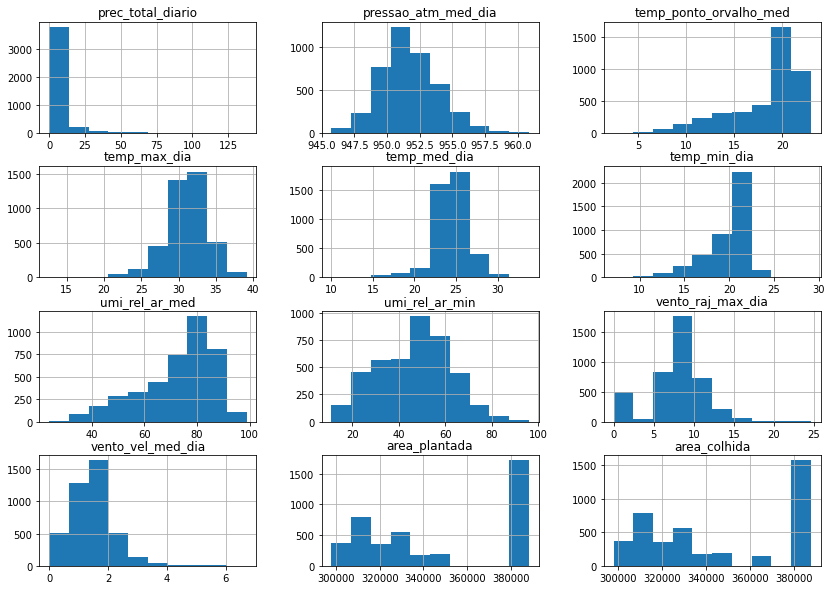

In [14]:
df = df_outer.dropna()
data = df['data']

df = df.drop(['data'], axis = 1).astype(str).stack().str.replace(',','.').unstack().astype(float)
df['ano'] = df_clima['ano'].astype(int)

df['data'] = pd.to_datetime(data)
df = df.set_index('data')

df.drop (['qtd_produzida', 'ano'], axis = 1).hist(figsize=(14, 10))

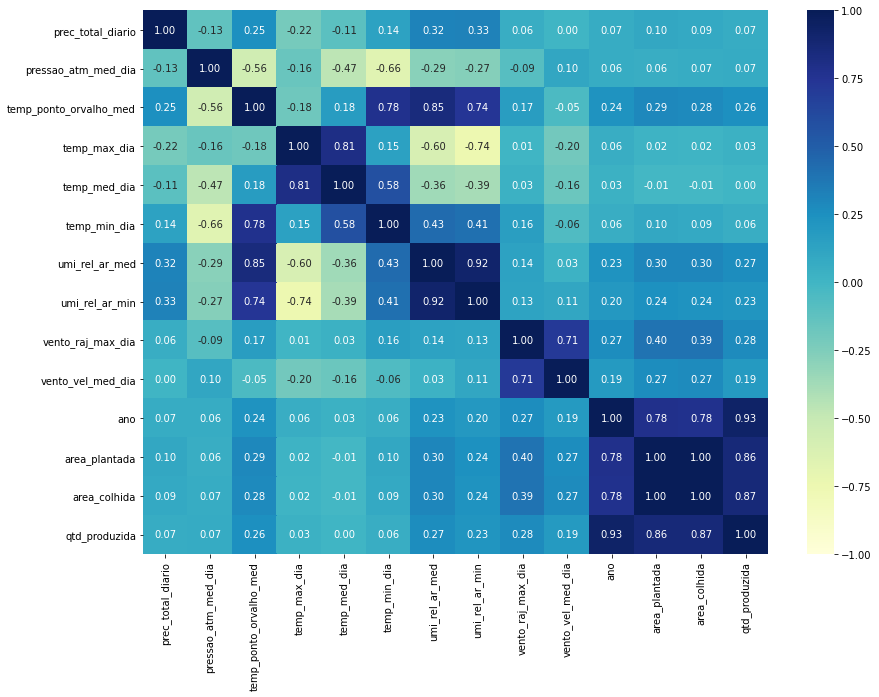

In [11]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=-1);

In [13]:
df.to_csv('data/final.csv')

In [13]:
X_train = df [:'2018'].drop (['nrand'], axis = 1)
y_train = df.loc [:'2018', 'nrand']
X_test = df ['2019':].drop (['nrand'], axis = 1)
y_test = df.loc ['2019':, 'nrand']


## Check Models

LR: -795979455002967359155601408.000000 (3082815173149748346251902976.000000)
KNN: -0.191400 (0.113386)
RF: -0.160772 (0.068593)
SVR: -0.003346 (0.005691)


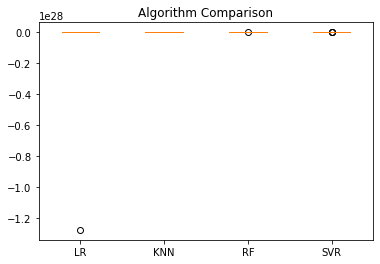

In [16]:
models = []
models.append(('LR', LinearRegression()))
# models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=len(df['ano'].unique()) - 1)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [17]:
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better = False)

In [20]:
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(2,6)]
}
tscv = TimeSeriesSplit(n_splits = len(df['ano'].unique()) - 1)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid = param_search, scoring = rmse_score)
gsearch.fit(X_train, y_train)

best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
y_true = y_test
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.9997
mean_squared_log_error:  0.0
r2:  0.9997
MAE:  568.4975
MSE:  5003811.2656
RMSE:  2236.92


In [19]:
X = df.drop (['qtd_produzida'], axis = 1) 
y = df['qtd_produzida']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


In [ ]:
model_v1 = LinearRegression()

In [ ]:
model_v1.fit(X_train, y_train)

In [ ]:
predict_v1 = model_v1.predict(X_test)

In [ ]:
metrics.mean_squared_error(y_test, predict_v1)

In [ ]:
metrics.mean_absolute_error(y_test, predict_v1)

In [ ]:
metrics.r2_score(y_test, predict_v1)

In [ ]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_regr.score(X_test, y_test)